In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from exposure_matrices import *
import seaborn as sns
import numpy as np
from matplotlib import colormaps, pyplot as plt, colors
from sklearn.decomposition import PCA
import plotly.express as px

In [4]:
data = load_data(2022)
racial_pops = ["AM_IND", "BLACK", "HISP", "ASIAN", "WHITE", "Multi"]
racial_pops_prefixed = list(map(lambda s: "NUM_" + s, racial_pops))
county_names = [
    "NEW YORK",
    "BRONX",
    "QUEENS",
    "KINGS",
    "WESTCHESTER",
    "NYC",
    "NY STATE",
    "ONONDAGA",
    "OSWEGO",
]

In [11]:
# plot_exposure_matrices(data, county_names, racial_pops, renormalize=False)
# plot_exposure_matrices(data, county_names, racial_pops, renormalize=True)
county_names = list(data.COUNTY_NAME.unique())

In [12]:
E_s = [get_exposure_mat(data, county_name, racial_pops_prefixed, renormalize=True) for county_name in county_names]
E_labels = sum([[f"{county_name} {racial_pop}" for racial_pop in racial_pops] for county_name in county_names], [])
E_race_labels = sum([[f"{racial_pop}" for racial_pop in racial_pops] for _ in county_names], [])

/home/daniel/Documents/ny_education/src/analysis/exposure_matrices.py:60: RuntimeWarning:

divide by zero encountered in scalar divide

/home/daniel/Documents/ny_education/src/analysis/exposure_matrices.py:60: RuntimeWarning:

invalid value encountered in scalar multiply



In [21]:
np.isnan(np.concatenate(E_s, axis=0)).any(axis=1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,

In [7]:
pca = PCA(n_components=3)
E_s = np.concatenate(E_s, axis=0)
E_pca = pca.fit_transform(E_s)

<Axes: >

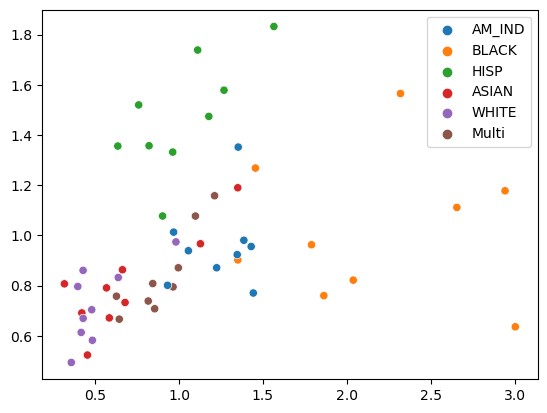

In [8]:
# E_s.shape
# E_race_labels
sns.scatterplot(x=E_s[:, 1],y= E_s[:, 2], hue=E_race_labels)

In [10]:
px.scatter_3d(x=E_pca[:, 0], y=E_pca[:, 1], z=E_pca[:, 2], color=E_race_labels)
# sns.scatterplot(x=E_pca[:, 1], y=E_pca[:, 2], ax=ax, hue=E_race_labels)

# ax.set(aspect="equal")
# E_flattened